## Application 2

In [1]:
import DSGRN
import Berry_2019_figures_results as Berry
from min_interval_posets import posets, poset_distance
import random
from copy import deepcopy
from IPython import display
import matplotlib.pyplot as plt
from importlib import reload
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

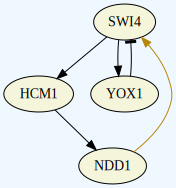

In [2]:
wavepool = DSGRN.Network("good_wavepool.txt")
DSGRN.DrawGraph(wavepool)

In [3]:
wt1_file = "WT1_WT2_microarray_interpolated/wt1_microarray_coregenes_lifepoints_interpol_trim.csv"
wt2_file = "WT1_WT2_microarray_interpolated/wt2_microarray_coregenes_lifepoints_interpol.csv"


In [4]:
# graph data
def make_fig(fname,savename,start_time=None,end_time=None,names=None):
    curves = Berry.row(fname)
    subset_curves = deepcopy(curves)
    if names is not None:
        for name in curves:
            if name not in names:
                subset_curves.pop(name)
    for name,curve in subset_curves.items():
        n = curve.normalize()
        if start_time is not None and end_time is not None:
            n = curve.trim(start_time,end_time)
        times,vals = zip(*n.items())
        plt.plot(times,vals,label=r"${}$".format(name))
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.ylabel("normalized expression")
    plt.xlabel("times")
    plt.savefig(savename,bbox_extra_artists=(lgd,), bbox_inches='tight') 
    display.display(plt.show())
    return [name for name in curves]
    

In [5]:
def make_posets(p,network):
    events = list(p[1][0])
    event_ordering = list(p[1][1]) 
    poe = DSGRN.PosetOfExtrema(network, events, event_ordering)
    return poe,len(events)

In [6]:
start_time = 0
end_time = 170
names = ["YOX1","SWI4","HCM1","NDD1"]
epsilons = [0.005*x for x in range(31)]



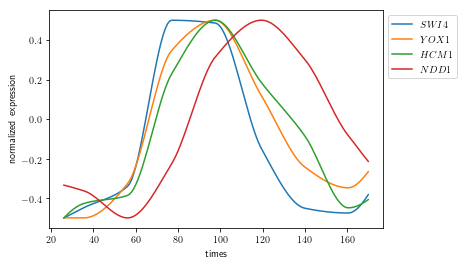

None

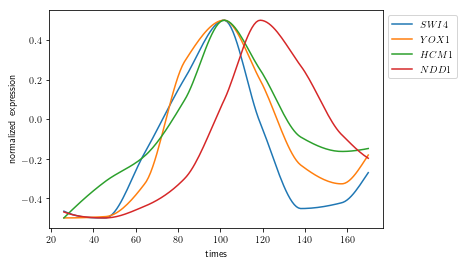

None

In [7]:
_ = make_fig(wt1_file,"time_series_rep1_trimmed.pdf",start_time,end_time,names)
_ = make_fig(wt2_file,"time_series_rep2_trimmed.pdf",start_time,end_time,names)

In [8]:
posets1 = Berry.getposets(wt1_file,"row",epsilons,names,start_time,end_time)
posets2 = Berry.getposets(wt2_file,"row",epsilons,names,start_time,end_time)
posets3 = Berry.getposets(wt2_file,"row",epsilons,["CLB2","SWI4","HCM1","NDD1"],start_time,end_time)


Replicate 1, eps 0.01


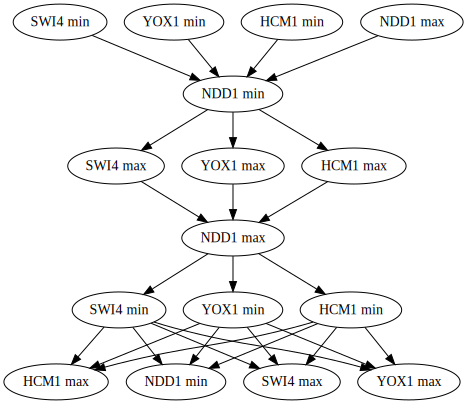

Replicate 2, eps 0.01


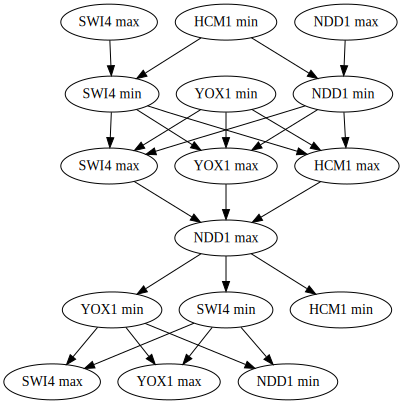

In [9]:
print("Replicate 1, eps 0.01")
poe, N = make_posets(posets1[2],wavepool)
display.display(DSGRN.DrawGraph(poe))
with open("example_poset_app2_rep1.dot","w") as f:
    f.write(poe.graphviz())
print("Replicate 2, eps 0.01")
poe, N = make_posets(posets2[2],wavepool)
display.display(DSGRN.DrawGraph(poe))
with open("example_poset_app2_rep2.dot","w") as f:
    f.write(poe.graphviz())


In [10]:
def change_labels(posets,start_name,end_name):
    relabeled_posets = []
    for eps,pos in posets:
        extrema = pos[0]
        newex = []
        for ex in extrema:
            if ex[0] == start_name:
                newex.append((end_name,ex[1]))
            else:
                newex.append(ex)
        newpos = (tuple(newex),pos[1])
        relabeled_posets.append((eps,newpos))
    return relabeled_posets
 

In [11]:
posets4 = change_labels(posets3,"CLB2","YOX1")

In [12]:
def calc_dists(posets1,posets2,printme=False):
    dists = []
    sizes = []
    for k,(p1,p2) in enumerate(zip(posets1,posets2)):
        if printme:
            print("Calculating for poset {} of {}...".format(k+1,len(posets1)))
        g1 = poset_distance.poset_to_nx_graph(p1[1])
        g2 = poset_distance.poset_to_nx_graph(p2[1])
        sizes.append((len(g1.nodes())+len(g1.edges()), len(g2.nodes())+len(g2.edges())))
        dists.append(poset_distance.dag_distance(g1,g2))
    return dists,sizes


In [13]:
def plot_dists(epsilons,dists,label="",ylabel="Poset distance",ylim=[0,1]):
    plt.plot(epsilons,dists,linewidth=2,label=label)
    plt.xlabel(r"$\mathrm{\epsilon}$",fontsize=16)
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.legend()

In [14]:
def norm_dist(dists,sizes):
    return [d/s for d,s in zip(dists,(a+b for a,b in sizes))]

In [15]:
dists12,sizes12 = calc_dists(posets1,posets2)
dists13,sizes13 = calc_dists(posets1,posets3)
dists14,sizes14 = calc_dists(posets1,posets4)


In [16]:
normdists12 = norm_dist(dists12,sizes12)
normdists13 = norm_dist(dists13,sizes13)
normdists14 = norm_dist(dists14,sizes14)

Distance with same genes.
Distance with one swapped gene.
Distance with one swapped gene relabeled.


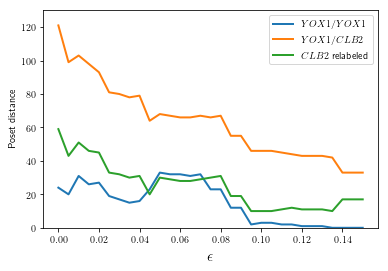

In [17]:
ylim=[0,130]
print("Distance with same genes.")
plot_dists(epsilons,dists12,ylabel="Poset distance",label=r"$YOX1$/$YOX1$",ylim=ylim)
print("Distance with one swapped gene.")
plot_dists(epsilons,dists13,ylabel="Poset distance",label=r"$YOX1$/$CLB2$",ylim=ylim)
print("Distance with one swapped gene relabeled.")
plot_dists(epsilons,dists14,ylabel="Poset distance",label=r"$CLB2$ relabeled",ylim=ylim)
plt.savefig("poset_distances.pdf") 

Distance with same genes.
Distance with one swapped gene.
Distance with one swapped gene relabeled.


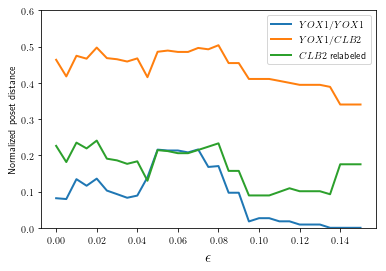

In [18]:
ylim = [0,0.6]
print("Distance with same genes.")
plot_dists(epsilons,normdists12,ylabel="Normalized poset distance",label=r"$YOX1$/$YOX1$",ylim=ylim)
print("Distance with one swapped gene.")
plot_dists(epsilons,normdists13,ylabel="Normalized poset distance",label=r"$YOX1$/$CLB2$",ylim=ylim)
print("Distance with one swapped gene relabeled.")
plot_dists(epsilons,normdists14,ylabel="Normalized poset distance",label=r"$CLB2$ relabeled",ylim=ylim)
plt.savefig("poset_distances_normalized.pdf") 

Similarity with same genes.
Similarity with one swapped gene.
Similarity with one swapped gene relabeled.


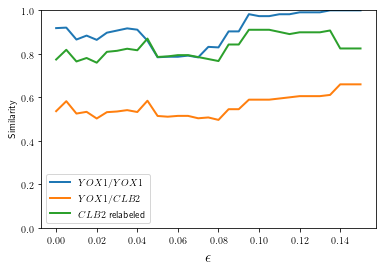

In [19]:
ylim = [0.0,1.0]
print("Similarity with same genes.")
plot_dists(epsilons,[1-n for n in normdists12],ylabel="Similarity",label=r"$YOX1$/$YOX1$",ylim=ylim)
print("Similarity with one swapped gene.")
plot_dists(epsilons,[1-n for n in normdists13],ylabel="Similarity",label=r"$YOX1$/$CLB2$",ylim=ylim)
print("Similarity with one swapped gene relabeled.")
plot_dists(epsilons,[1-n for n in normdists14],ylabel="Similarity",label=r"$CLB2$ relabeled",ylim=ylim)
plt.savefig("similarity.pdf") 

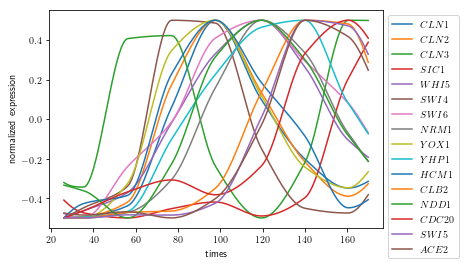

None

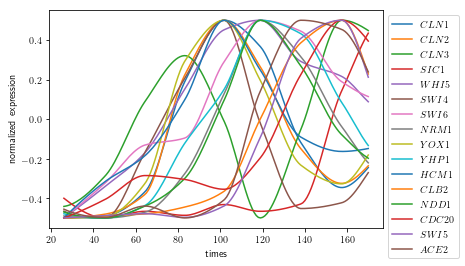

None

In [20]:
all_names = make_fig(wt1_file,"time_series_rep1_trimmed_all.pdf",start_time,end_time)
_ = make_fig(wt2_file,"time_series_rep2_trimmed_all.pdf",start_time,end_time)

In [21]:
Nexps = 100
epsilons = [0.01*x for x in range(16)]

normdists = [] 

for _ in range(Nexps):
    names = random.sample(all_names,4)
    posets1 = Berry.getposets(wt1_file,"row",epsilons,names,start_time,end_time)
    posets2 = Berry.getposets(wt2_file,"row",epsilons,names,start_time,end_time)
    dists,sizes=calc_dists(posets1,posets2)
    normdists.append(norm_dist(dists,sizes))

In [25]:
def plot_sim_many(epsilons,normdists,ylabel="Similarity",ylim=[0,1.0]):
    for ndist in normdists:
        plt.plot(epsilons,[1-n for n in ndist],linewidth=0.5,color='tab:gray')
    mdists = []
    for i in range(len(epsilons)):
        l = []
        for ndist in normdists:
            l.append(ndist[i])
        mdists.append(sum(l)/len(normdists))
    plt.plot(epsilons,[1-m for m in mdists],linewidth=3,color="k")
    plt.ylim(ylim)
    plt.xlabel(r"$\mathrm{\epsilon}$",fontsize=16)
    plt.ylabel(ylabel)


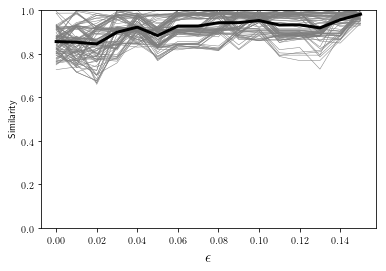

In [26]:
epsilons = [0.01*x for x in range(16)]
plot_sim_many(epsilons,normdists)
plt.savefig("similarity_mean_of_many.pdf") 